In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import h5py
import cv2
import os

In [156]:
#!echo password_on_your_computer | sudo -S pip3 install imutils

In [157]:
#!echo password_on_your_computer | sudo -S pip3 install opencv-python

In [14]:
def image_to_feature_vector(image, size=(32, 32)):
    
    return cv2.resize(image, size).flatten()

In [19]:
imagePaths = list(paths.list_images("data/train"))
 
dataTmp = []
labelsTmp = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
 
    features = image_to_feature_vector(image)
    dataTmp.append(features)
    labelsTmp.append(label)
 
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

In [17]:
labels = labelsTmp
data = dataTmp
le = LabelEncoder()
labels = le.fit_transform(labels)
 
data = np.array(data) / 255.0
labels = np_utils.to_categorical(labels, 2)
 
(trainData, testData, trainLabels, testLabels) = train_test_split\
                    (data, labels, test_size=0.25, random_state=42)

In [18]:
model = Sequential()
model.add(Dense(768, input_dim=3072, kernel_initializer="uniform", activation="relu"))
model.add(Dense(384, kernel_initializer="uniform", activation="relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

In [87]:
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.fit(trainData, trainLabels, nb_epoch=50, batch_size=128)

In [23]:
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

[INFO] evaluating on testing set...
6144/6250 [============================>.] - ETA: 0s[INFO] loss=0.6213, accuracy: 66.6720%


Length imagePathsTest:  30
dog


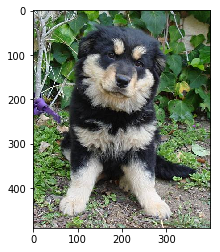

dog


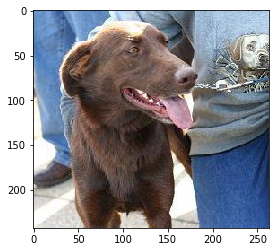

dog


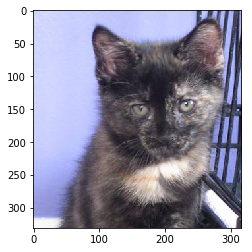

cat


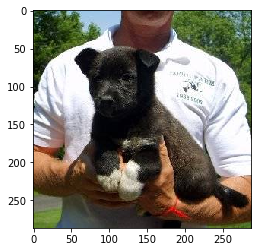

dog


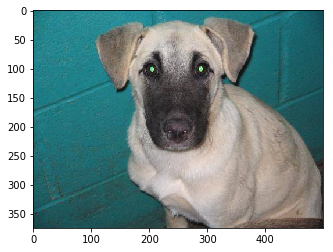

dog


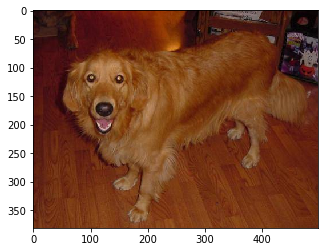

cat


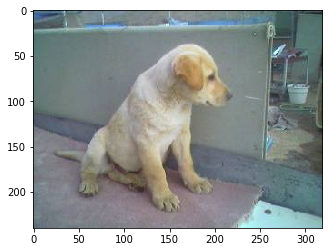

cat


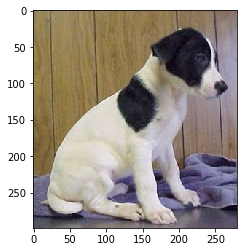

cat


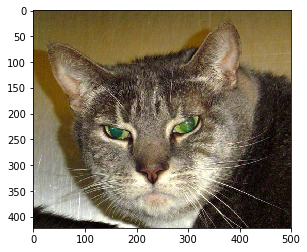

dog


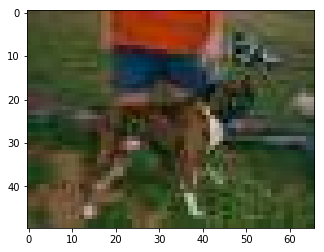

dog


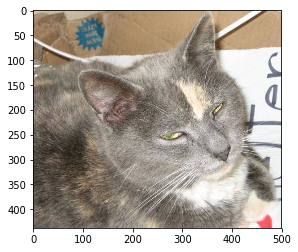

cat


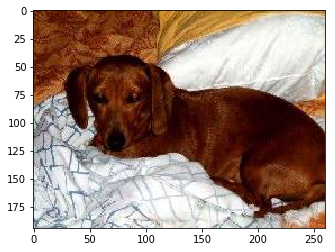

dog


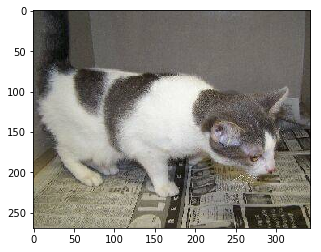

cat


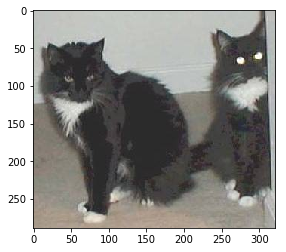

cat


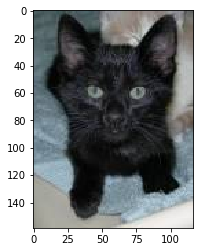

cat


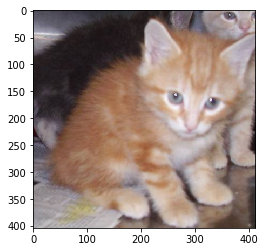

dog


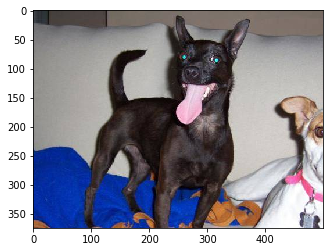

cat


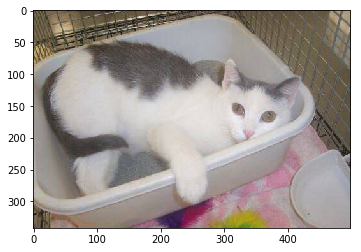

cat


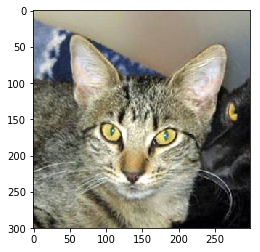

dog


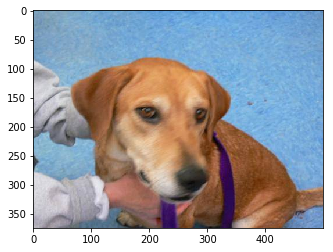

cat


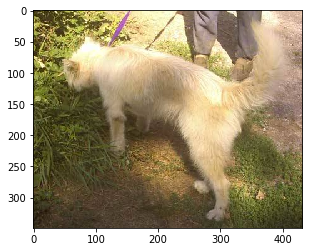

dog


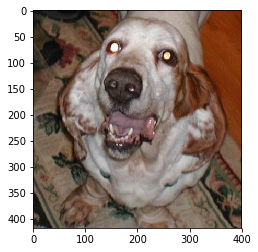

cat


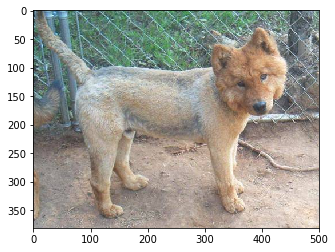

cat


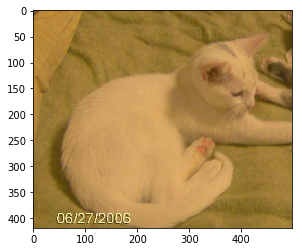

cat


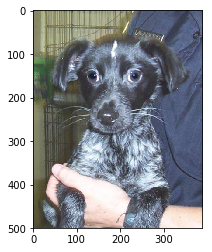

cat


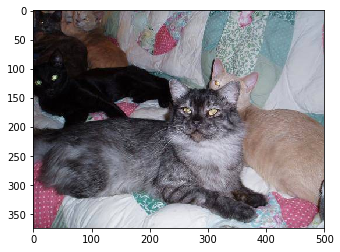

dog


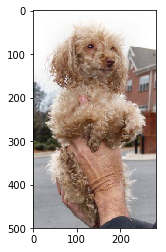

cat


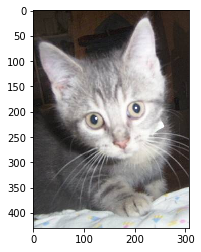

dog


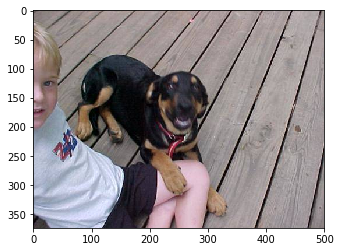

dog


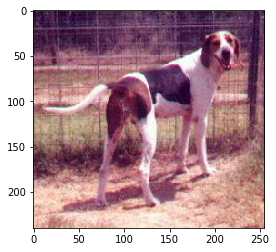

In [10]:
def predict_result():
    imagePathsTest = list(paths.list_images("data/test1"))[900:930]
    print("Length imagePathsTest: ", len(imagePathsTest))
    testArray = []

    for (i, imagePath) in enumerate(imagePathsTest):
        image = cv2.imread(imagePath)
        features = image_to_feature_vector(image)
        testArray.append(features)

    testArray = np.array(testArray) / 255.0
    
    return testArray, imagePathsTest
    
    
def show_predicted_result(model, testArray, imagePathsTest):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    results = model.predict_classes(testArray, batch_size=128, verbose=0)

    for ind, i in enumerate(imagePathsTest):
        print("cat" if results[ind] == 0 else "dog")
        img = mpimg.imread(i)
        imgplot = plt.imshow(img)
        plt.show()
        

testArray, imagePathsTest = predict_result()
show_predicted_result(model, testArray, imagePathsTest)        

In [6]:
# If you wanna save model in file, you'll need to install h5py library
# But after this you'll need reboot you jupyter. In order to avoid it,
# you have to just reload your keras.model (just uncomment 3 lines of 
# code below). And only after this you can save model correct.
# Of course, if you installed h5py earlier, you don't need to uncomment
# this code.

# import keras
# from importlib import reload
# reload(keras.models)

# save model in file
#model.save("cats_vs_dogs_model.h5")

# returns a compiled model
from keras.models import load_model
model = load_model('cats_vs_dogs_model.h5')